(807, 14)


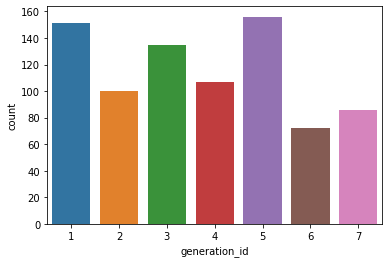

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Read the csv file, and check its top rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

#countplot is a default bar chart in seaboarn
#A semicolon (;) at the end of the statement will supress printing the information
sns.countplot(data=pokemon, x='generation_id');

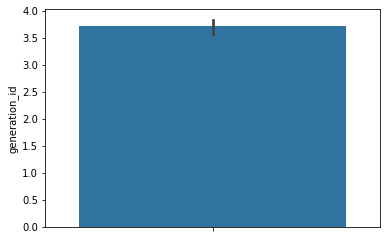

In [76]:
#what does the barplot do in seaborn
sns.barplot(y='generation_id', data=pokemon);

In [77]:
#apparently not a bar chart,

In [78]:
#changing the color palette on the bar chart
#getting the current palette
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [79]:
#selecting the first in the list of tuple of palettes
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

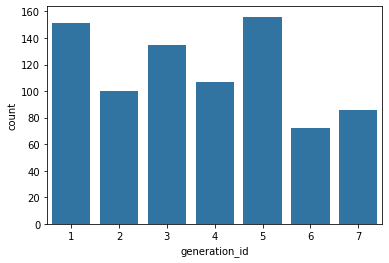

In [80]:
#assigning to a variable
base_color = sns.color_palette()[0]

#replotting the countplot using color argument
sns.countplot(x='generation_id', data=pokemon, color = base_color);

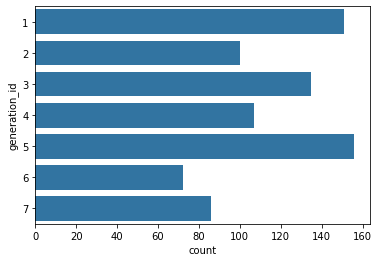

In [81]:
#making the plot horizontal, just change the x to a y
sns.countplot(y='generation_id', data=pokemon, color=base_color);

### Using matplotlib to plot bar charts

matplotlib.pyplot.bar() is the bar chart function in matplotlib.

the full function and arguments are
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, \*, align = 'center', data = None)
where
 - x is the data array
 - height is the height of the bars
 - width is the width of the bars
 - bottom is the y coordinates of the bars
 - align is the alignment of the bars to the x-coordinates
 - data is the data source

##### a simple bar chart (same as the seaborn chart)

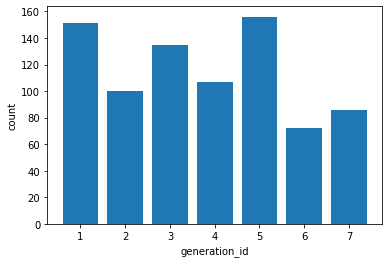

In [82]:
#Return the Series having unique values
x = pokemon['generation_id'].unique()

#Return the series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

#the plot itself
plt.bar(x,y)

#Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

#displaying the plot
plt.show();

#### sorting nominal data using seaborn charts

###### the static way

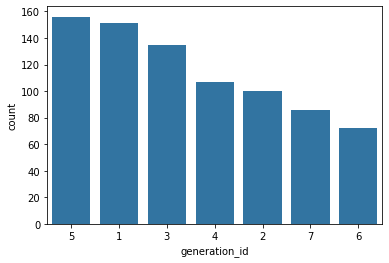

In [83]:
#static-order the bars
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

###### dynamically

In [84]:
#use value_counts to get frequency, the frequency of the series will automatically be sorted
#using value_counts
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [85]:
#store the series created by value_counts in an object
freq = pokemon['generation_id'].value_counts()

In [86]:
#get the index of the freq series by using the index attribute
gen_order = freq.index

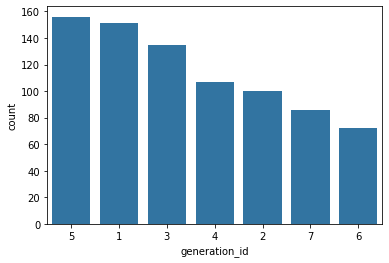

In [87]:
#plot using order and the index object just created
sns.countplot(x='generation_id', data=pokemon, color = base_color, order = gen_order);

### Rotating labels

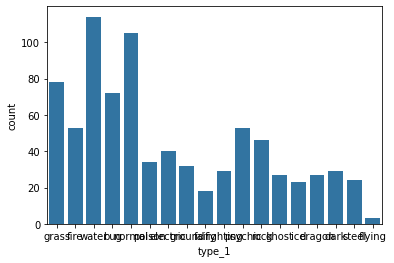

In [88]:
sns.countplot(x='type_1', data=pokemon, color=base_color);

labels above are hard to see, let's flip them 90 degrees

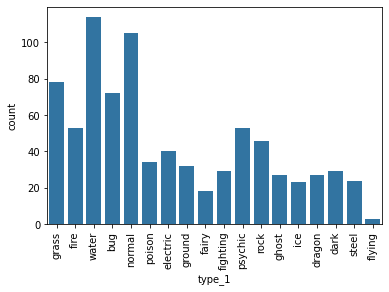

In [89]:
sns.countplot(x='type_1', data = pokemon, color = base_color);

#using matplotlib to rotate the labels
plt.xticks(rotation=90);

#### an alternative would be to rotate the entire chart to a horizontal bar chart

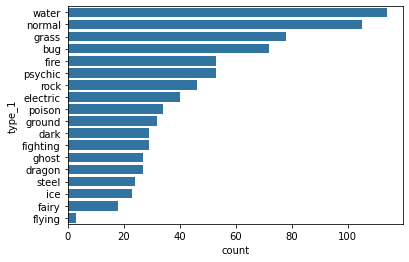

In [90]:
freq = pokemon['type_1'].value_counts()
type_order = freq.index
sns.countplot(y='type_1', data=pokemon, color=base_color, order = type_order);

## Plotting relative Frequency

In [91]:
#looking at the data
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


for our purpose we want to "unpivot" the data so we have id, species, a new column type_level which indicates whether the record is that pokemon's type 1 or type 2, and finally a type column, indicating the actual type with the associated type_level.

we can use melt to unpivot
df.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)

where
 - id_vars is a tuple representing the columns to use as identifier variables
 - value_vars is a tuple representing the column(s) to unpivot (remove, out of place)
 - var_name which is the name of the **new** column
 - value_name which is a name to use for the value of the columns that are unpivoted

In [92]:
#playing around with melt
pokemon.melt(id_vars = ['id','species'],
             value_vars = ['hp','attack','defense','speed'],
             var_name = 'stat_type',
             value_name = 'stat_value')

,id,species,stat_type,stat_value
0,1,bulbasaur,hp,45
1,2,ivysaur,hp,60
2,3,venusaur,hp,80
3,4,charmander,hp,39
4,5,charmeleon,hp,58
...,...,...,...,...
3223,803,poipole,speed,73
3224,804,naganadel,speed,121
3225,805,stakataka,speed,13
3226,806,blacephalon,speed,107


In [93]:
#creating a new df
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level',
                          value_name = 'type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [94]:
#finding frequency of unique values of the type column, remember that value_counts auto sorts
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [95]:
#getting descending order of type by frequency
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

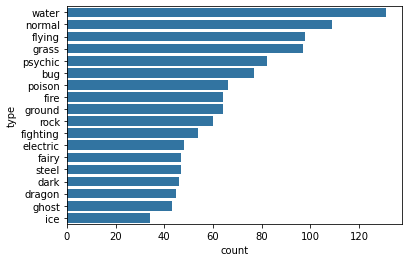

In [96]:
#creating a horizontal bar chart of types by frequency
base_color = sns.color_palette()[0]
sns.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

### plotting proportions

In [97]:
#getting the total volume of non_null pokemon records in type column, ie the total
pkmn_types['type'].value_counts().sum()

1212

In [98]:
#saving to a var
n_pokemon = pkmn_types['type'].value_counts().sum()

In [99]:
#the highest frequency in the 'type' column
max_type_count = type_counts[0]

In [100]:
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [101]:
#Returning the max proportion, i.e. the longest bar in this soon-to-be-charted proportion chart
max_prop = max_type_count/n_pokemon
max_prop

0.10808580858085809

In [102]:
#redoing n_pokemon, want proportion of pokemon not records of type
n_pokemon = pokemon.shape[0]

In [103]:
max_prop = max_type_count/n_pokemon
max_prop

0.1623296158612144

using the max proportion, we now want to create our proportion axis tick values.  use np.arange(start, end, step)

In [104]:
np.arange(0,max_prop,0.02)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [105]:
tick_props = np.arange(0, max_prop, 0.02)

next, we need to create strings for the labels of these ticks, we can use list comprehension here to make it more pythonic

In [106]:
#the list comprehension will loop through our array created from arange
#using string formatting it will pass the value to the formatting which specifies 
#2 digits of precision denoted by :0.2 and floating point denoted by f
#here is the documentation https://docs.python.org/2/library/string.html#format-string-syntax
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

using all of the above, create a proportion plot

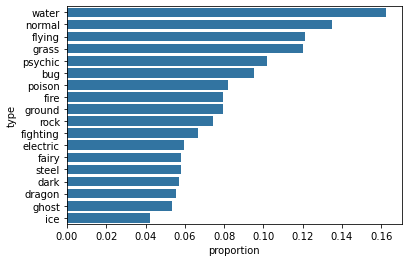

In [107]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
#changing the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names) #first arg is tick locations, second it tick labels
plt.xlabel('proportion');

### proportions using group by and contingency tables

In [108]:
count_type_df = pkmn_types.groupby('type')[['id']].count().sort_values('id',ascending=False)

In [109]:
#creating proportion column
count_type_df['proportion'] = count_type_df['id'].apply(lambda x:x/n_pokemon).round(2)
count_type_df

,id,proportion
type,,
water,131,0.16
normal,109,0.14
flying,98,0.12
grass,97,0.12
psychic,82,0.10
bug,77,0.10
poison,66,0.08
fire,64,0.08
ground,64,0.08


In [110]:
#renaming id column to count
count_type_df.rename(columns = {'id':'count'}, inplace=True)
count_type_df

,count,proportion
type,,
water,131,0.16
normal,109,0.14
flying,98,0.12
grass,97,0.12
psychic,82,0.10
bug,77,0.10
poison,66,0.08
fire,64,0.08
ground,64,0.08


In [111]:
#resetting index
count_type_df.reset_index(inplace=True)

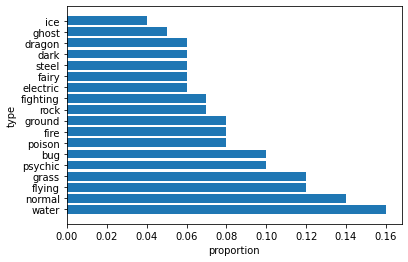

In [112]:
#new chart
#Return the Series having unique values
x = count_type_df['type']

#Return the series having frequency count of each unique value
y = count_type_df['proportion']

#the plot itself
plt.barh(x,y)

#Labeling the axes
plt.xlabel('proportion')
plt.ylabel('type')

#displaying the plot
plt.show();

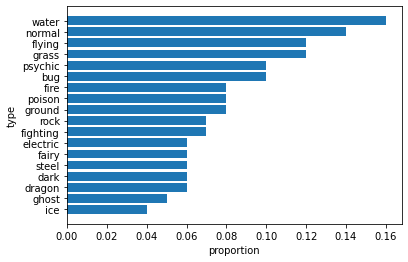

In [113]:
#flipping order
count_type_df.sort_values('proportion', inplace=True)
#new chart
#Return the Series having unique values
x = count_type_df['type']

#Return the series having frequency count of each unique value
y = count_type_df['proportion']

#the plot itself
plt.barh(x,y)

#Labeling the axes
plt.xlabel('proportion')
plt.ylabel('type')

#displaying the plot
plt.show();

### printing text on the bars of a horizontal plot

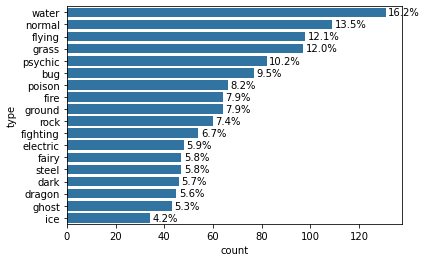

In [121]:
#printing original countplot of volume per type
sns.countplot(data=pkmn_types, y='type', color = base_color, order=type_order)

#logic to print the proportion text on the bar
for i in range(type_counts.shape[0]): #looping through the length of the array that contains the proportion values
    count=type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon) #converts proportion into percent string
    plt.text(count+1, i, pct_string , va='center' ) #prints string on bar
    #for more info on text() function see here https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html

### Printing text on the bars of a vertical plot

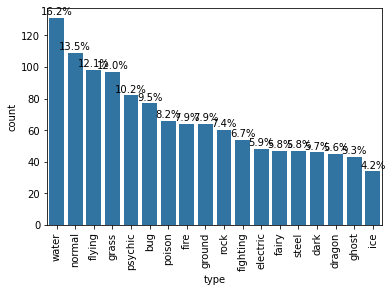

In [122]:
#same chart except change to y to x
sns.countplot(data=pkmn_types, x='type', color = base_color, order=type_order);

#get current tick locations and labels
locs, labels = plt.xticks(rotation=90)

#loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()] #label must be some type of object where text is an attribute?
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(loc, count+2, pct_string, ha='center', color='black')

In [123]:
#double checking on how zip function works
locs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [124]:
labels

[Text(0, 0, 'water'),
 Text(1, 0, 'normal'),
 Text(2, 0, 'flying'),
 Text(3, 0, 'grass'),
 Text(4, 0, 'psychic'),
 Text(5, 0, 'bug'),
 Text(6, 0, 'poison'),
 Text(7, 0, 'fire'),
 Text(8, 0, 'ground'),
 Text(9, 0, 'rock'),
 Text(10, 0, 'fighting'),
 Text(11, 0, 'electric'),
 Text(12, 0, 'fairy'),
 Text(13, 0, 'steel'),
 Text(14, 0, 'dark'),
 Text(15, 0, 'dragon'),
 Text(16, 0, 'ghost'),
 Text(17, 0, 'ice')]

In [128]:
x = zip(locs, labels)

In [129]:
print(tuple(x))

((0, Text(0, 0, 'water')), (1, Text(1, 0, 'normal')), (2, Text(2, 0, 'flying')), (3, Text(3, 0, 'grass')), (4, Text(4, 0, 'psychic')), (5, Text(5, 0, 'bug')), (6, Text(6, 0, 'poison')), (7, Text(7, 0, 'fire')), (8, Text(8, 0, 'ground')), (9, Text(9, 0, 'rock')), (10, Text(10, 0, 'fighting')), (11, Text(11, 0, 'electric')), (12, Text(12, 0, 'fairy')), (13, Text(13, 0, 'steel')), (14, Text(14, 0, 'dark')), (15, Text(15, 0, 'dragon')), (16, Text(16, 0, 'ghost')), (17, Text(17, 0, 'ice')))


#### changing plot size

In [149]:
from matplotlib import rcParams
#can specify the figure size in inches, for both x, and y axes
rcParams['figure.figsize'] = 11,5

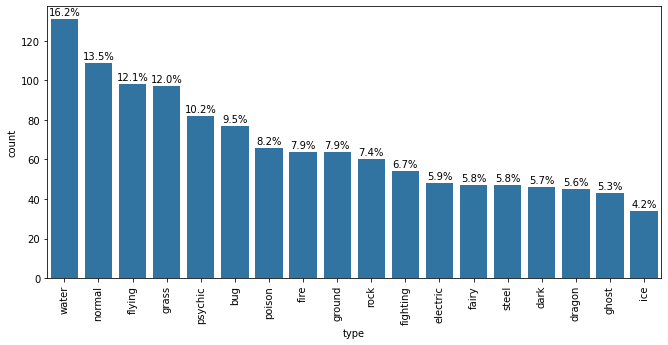

In [150]:
#same chart except change to y to x
sns.countplot(data=pkmn_types, x='type', color = base_color, order=type_order);

#get current tick locations and labels
locs, labels = plt.xticks(rotation=90)

#loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()] #label must be some type of object where text is an attribute?
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(loc, count+2, pct_string, ha='center', color='black')